In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('US_comments.csv', on_bad_lines='skip')
df.head()

/var/folders/6b/1hdxxqbn1gx40rtc5xgkfkqc0000gn/T/ipykernel_929/605833728.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('US_comments.csv', on_bad_lines='skip')


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [3]:
df.shape

(691400, 4)

In [4]:
# Checking for missing values
df.isnull().sum()
df.dropna(inplace=True) # removes all the missing values
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [5]:
# Performing Sentiment Analysis - ranges from -1 to 1
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [7]:
from textblob import TextBlob
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [8]:
# Extracting polarity for all comments
polarity=[]
for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0.0)

In [9]:
len(polarity)

691374

In [10]:
df['polarity']=polarity
df.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [11]:
'''
We will now use WordCloud Analysis which is 
a graphical representation of the text frequency
to understand the most frequently used keywords
'''
filter1=df['polarity']==1
df_positive=df[filter1]
filter2=df['polarity']==-1
df_negative=df[filter2]

In [12]:
print(df_positive.head())
print()
print(df_negative.head())

        video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0  

         video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
13

In [13]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [14]:
from wordcloud import WordCloud , STOPWORDS

In [15]:
set(STOPWORDS) # StopWords are those words that are removed during text analysis

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [16]:
type(df['comment_text'])
# for wordcloud , we need to frame our 'comment_text' feature into string
total_comments_positive = ' '.join(df_positive['comment_text'])

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

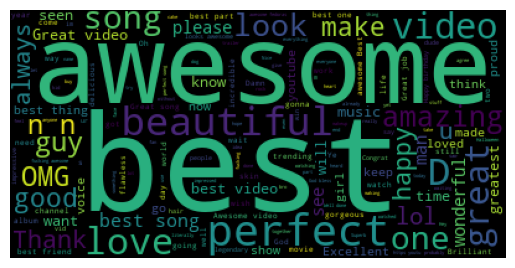

In [17]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)
plt.imshow(wordcloud)
plt.axis('off')

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

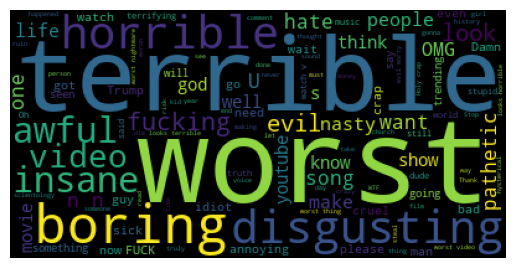

In [18]:
total_comments_negative = ' '.join(df_negative['comment_text'])
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)
plt.imshow(wordcloud2)
plt.axis('off')

In [19]:
# Performing Emoji Analysis
%pip install emoji==2.2.0

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=f52be6cbb7eeabcd8a6149857439d072fd06cc8d47015513efa7ea35ed182b3c
  Stored in directory: /Users/puravdoshi/Library/Caches/pip/wheels/e8/33/a1/3977489dc0d0c30f1fb3e683bc24c077a630ba8afe4e31435e
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [21]:
import emoji
emoji.__version__

'2.2.0'

In [22]:
emoji_list=[]
for comment in df['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [23]:
len(emoji_list)

294549

In [24]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [25]:
from collections import Counter
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [27]:
emoji_list_2=[]
emoji_list_count=[]
for i in range(10):
    emoji_list_2.append(Counter(emoji_list).most_common(10)[i][0])
    emoji_list_count.append(Counter(emoji_list).most_common(10)[i][1])

In [28]:
emoji_list_2

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [29]:
emoji_list_count

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [32]:
%pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 17.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


/Users/puravdoshi/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.

/Users/puravdoshi/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from font(s) DejaVu Sans.

/Users/puravdoshi/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.

/Users/puravdoshi/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128150 (\N{SPARKLING HEART}) missing from font(s) DejaVu Sans.

/Users/puravdoshi/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128149 (\N{TWO HEARTS}) missing from font(s) DejaVu Sans.



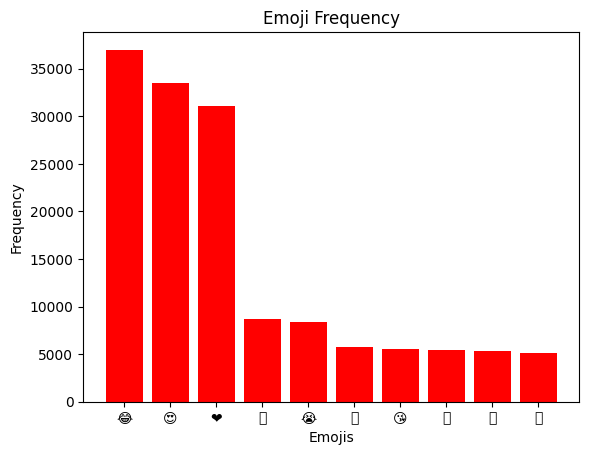

In [37]:
plt.bar(emoji_list_2,emoji_list_count,color='red')
plt.title('Emoji Frequency')
plt.xlabel('Emojis')
plt.ylabel('Frequency')
plt.show()

In [38]:
# Downloading entire data from YouTube
import os
files=os.listdir(r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/Youtube Text Analysis/additional_data')
files

['IN_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'JP_category_id.json',
 'FR_category_id.json',
 'INvideos.csv',
 'GB_category_id.json',
 'DEvideos.csv',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'CAvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 'US_category_id.json',
 'DE_category_id.json',
 'USvideos.csv',
 'GBvideos.csv']

In [39]:
csv_files=[file for file in files if '.csv' in file]
csv_files

['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [40]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [42]:
full_df=pd.DataFrame()
path=r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/Youtube Text Analysis/additional_data'
for file in csv_files:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',on_bad_lines='skip')
    full_df=pd.concat([full_df,current_df],ignore_index=True)
full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
375938,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
375939,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE â¶ http://ad.gt/2...
375940,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...


In [45]:
# Removing Duplicate entries and other preprocessing
full_df[full_df.duplicated()].shape
full_df=full_df.drop_duplicates()
full_df[full_df.duplicated()].shape

(0, 16)

In [47]:
# Exporting the csv file
full_df.to_csv(r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/Youtube Text Analysis/yt_sample_data.csv',index=False)

In [48]:
'''
Refer to the colab notebook to understand how to export the dataframe to
a .json and .sql format.
'''

'\nRefer to the colab notebook to understand how to export the dataframe to\na .json and .sql format.\n'

In [49]:
# Which category has the maximum likes ?
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


In [50]:
full_df['category_id'].unique()

array([24, 22, 25, 26, 10, 23, 17,  2,  1, 29, 27, 28, 20, 15, 19, 43, 30,
       44])

In [51]:
json_df=pd.read_json(r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/Youtube Text Analysis/additional_data/US_category_id.json')
json_df.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [52]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [53]:
category_dict={}
for item in json_df['items'].values:
    category_dict[int(item['id'])] = item['snippet']['title']
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [54]:
full_df['category_name']=full_df['category_id'].map(category_dict)
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style


In [56]:
full_df['category_name'].value_counts()

category_name
Entertainment            97365
People & Blogs           50164
Music                    36990
News & Politics          34599
Comedy                   24024
Sports                   21409
Film & Animation         18329
Howto & Style            17549
Gaming                   10433
Education                 7396
Science & Technology      7350
Autos & Vehicles          4596
Pets & Animals            4215
Nonprofits & Activism     2722
Travel & Events           1631
Shows                      726
Movies                      22
Trailers                     5
Name: count, dtype: int64

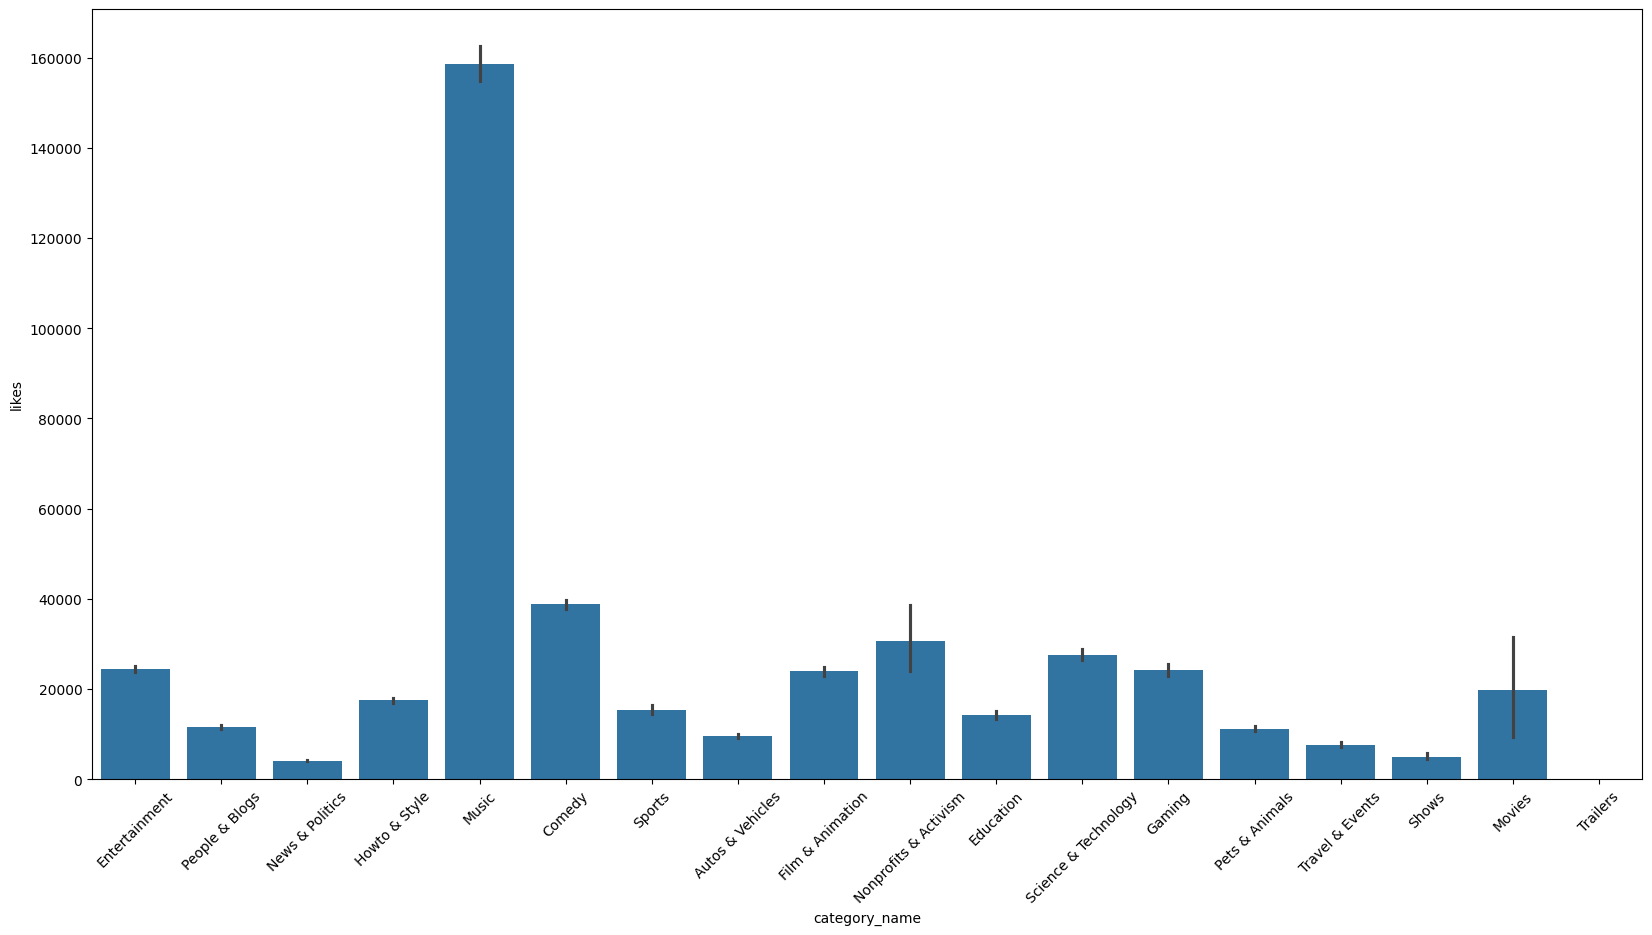

In [60]:
plt.figure(figsize=(20,10))
sns.barplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation=45)
plt.show()

In [61]:
# Is the audience engaged or not ?
full_df['like_ratio']=(full_df['likes']/full_df['views'])*100
full_df['dislike_ratio']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_ratio']=(full_df['comment_count']/full_df['views'])*100
full_df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_ratio,dislike_ratio,comment_ratio
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics,0.393123,0.177842,0.216322
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style,11.557009,0.136210,1.485704


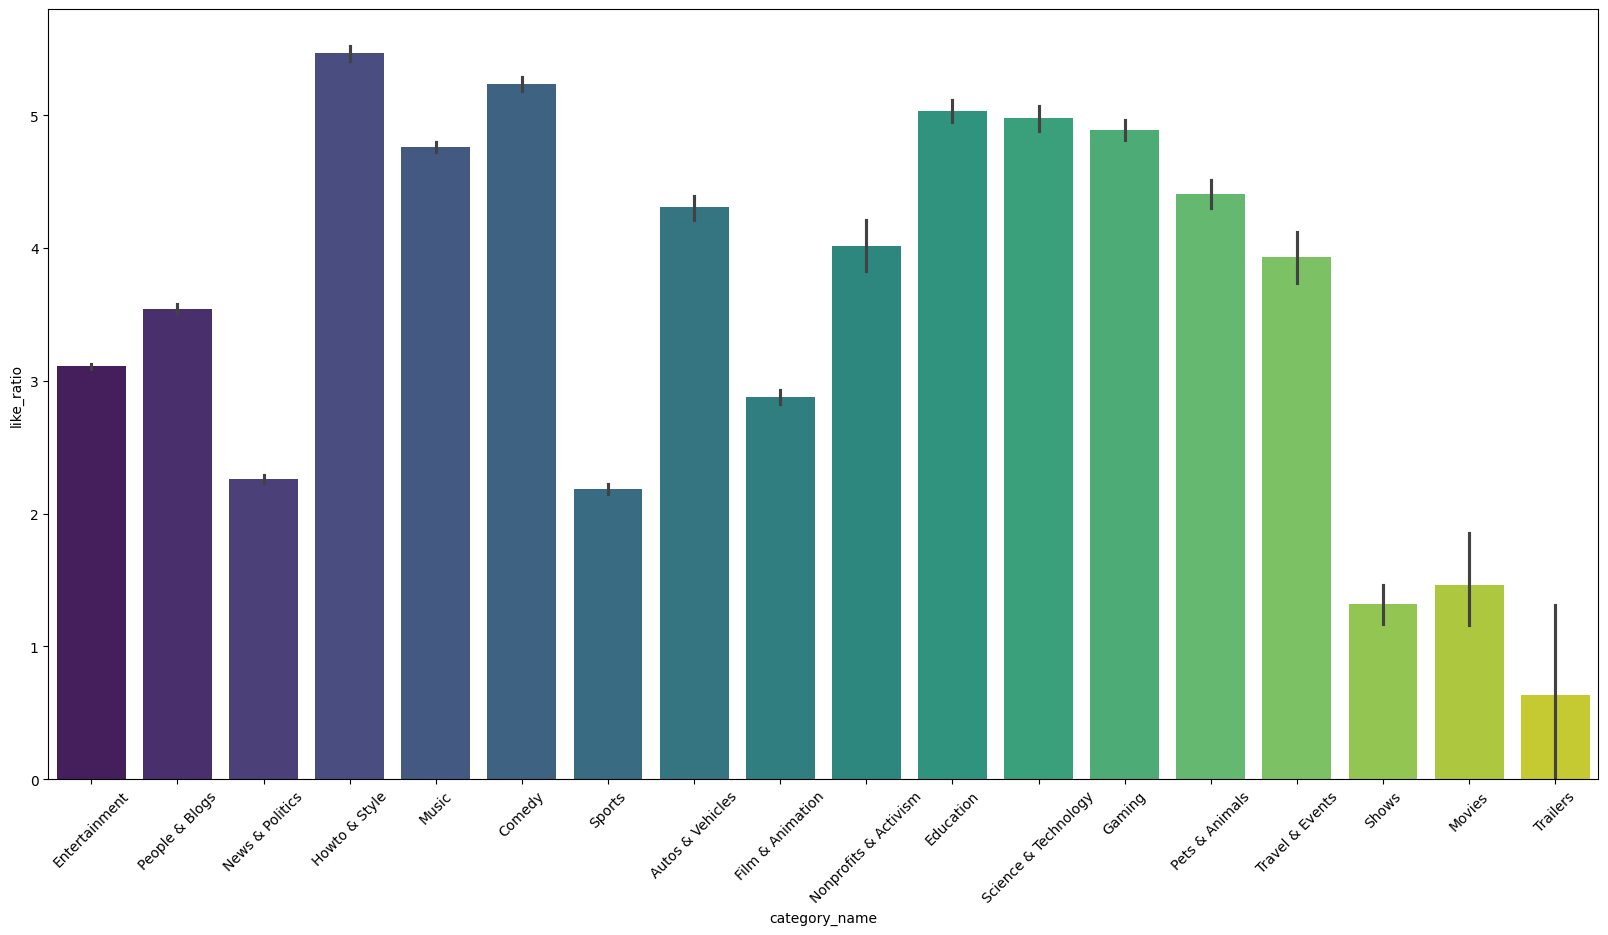

In [62]:
plt.figure(figsize=(20,10))
sns.barplot(x='category_name',y='like_ratio',data=full_df,palette='viridis')
plt.xticks(rotation=45)
plt.show()

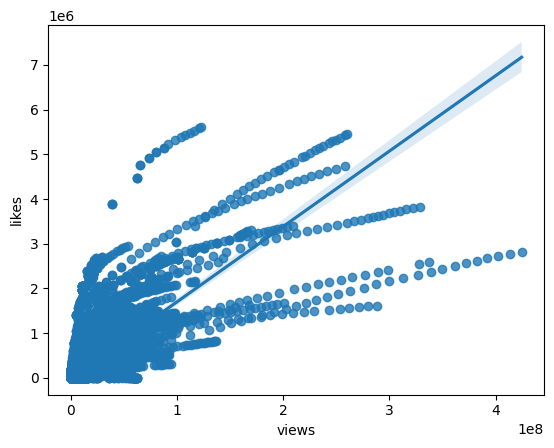

In [63]:
sns.regplot(x='views',y='likes',data=full_df)
plt.show()

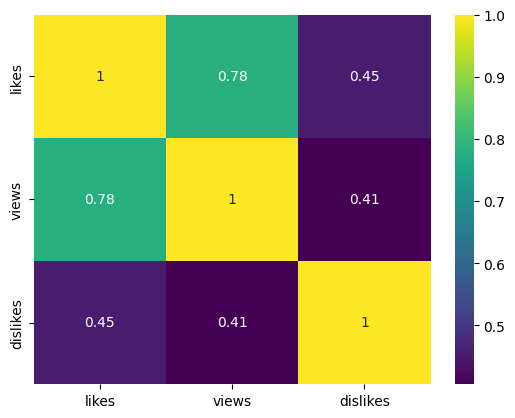

In [64]:
# Correlation between likes, views and dislikes
sns.heatmap(full_df[['likes','views','dislikes']].corr(),cmap='viridis',annot=True)
plt.show()

In [66]:
# full_df['channel_title'].value_counts()
full_df.groupby(['channel_title']).size().sort_values(ascending=False)

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Tesoros Enterrados                      1
Anton Neverov                           1
Thalia 444                              1
Thaitv6 Official                        1
Thad Broman                             1
Length: 37824, dtype: int64

In [68]:
cdf=full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
cdf.rename(columns={0:'Total_videos'},
        inplace=True)
cdf

,channel_title,Total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Tesoros Enterrados,1
37820,Anton Neverov,1
37821,Thalia 444,1
37822,Thaitv6 Official,1


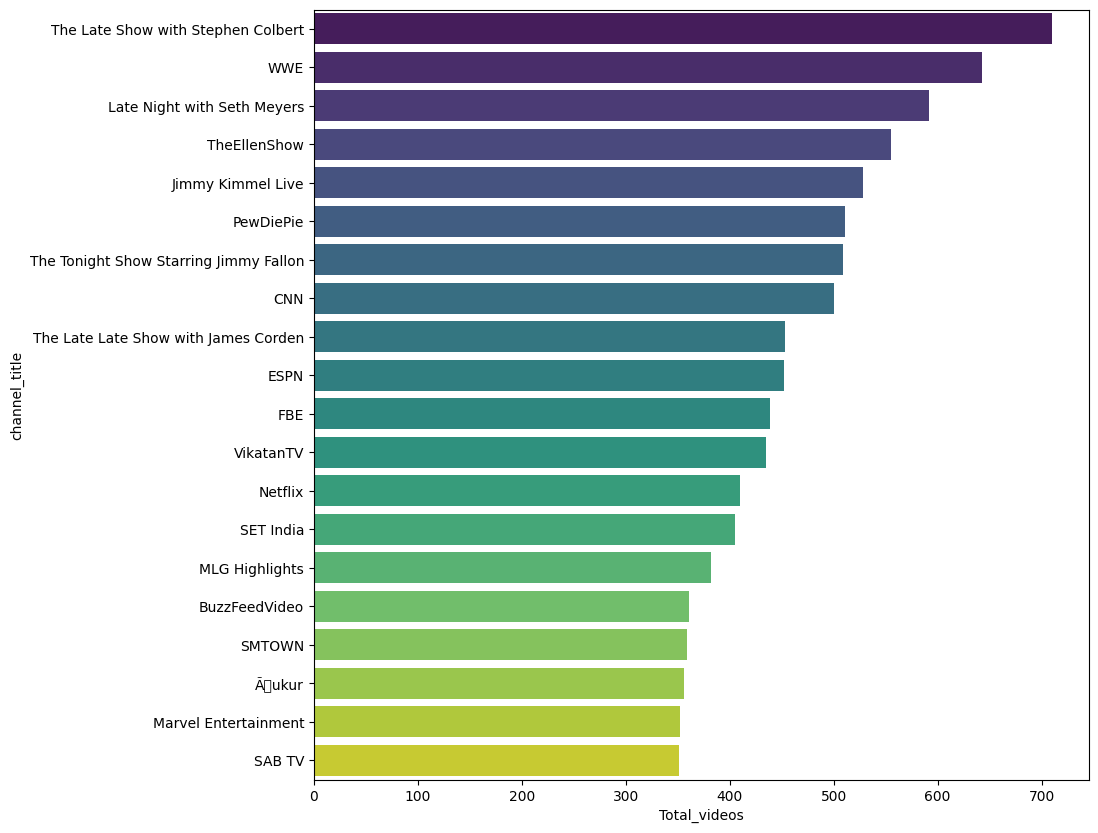

In [81]:
plt.figure(figsize=(10,10))
x=cdf['Total_videos'][0:20]
y=cdf['channel_title'][0:20]
sns.barplot(x='Total_videos',y='channel_title',data=cdf[0:20],palette='viridis')
plt.show()

In [82]:
# Does punctuations have any effect on the likes and dislikes ?
full_df['title'][0]

'CapÃ\xadtulo 12 | MasterChef 2017'

In [83]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [86]:
punc=[char for char in full_df['title'][0] if char in string.punctuation]
len(punc)

1

In [87]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [89]:
full_df['count_punctuation']=full_df['title'].apply(punc_count)

In [90]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_ratio,dislike_ratio,comment_ratio,count_punctuation
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,...,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010,1
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,...,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522,3
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,...,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114,1
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,...,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics,0.393123,0.177842,0.216322,1
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,...,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style,11.557009,0.136210,1.485704,1


<Axes: >

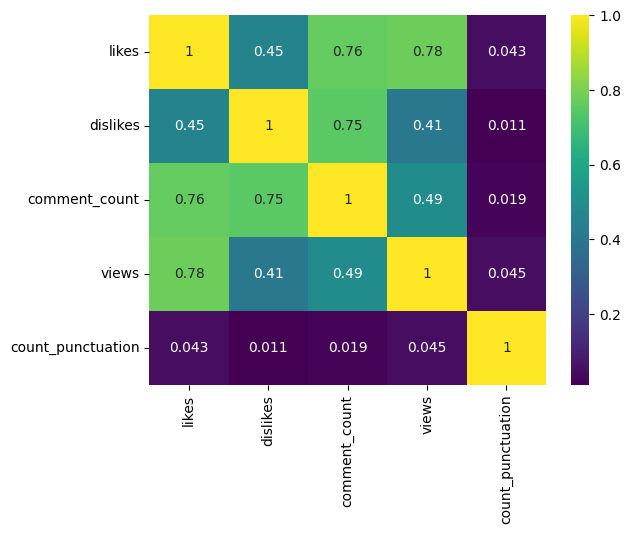

In [92]:
sns.heatmap(full_df[['likes','dislikes','comment_count','views','count_punctuation']].corr(),annot=True,cmap='viridis')

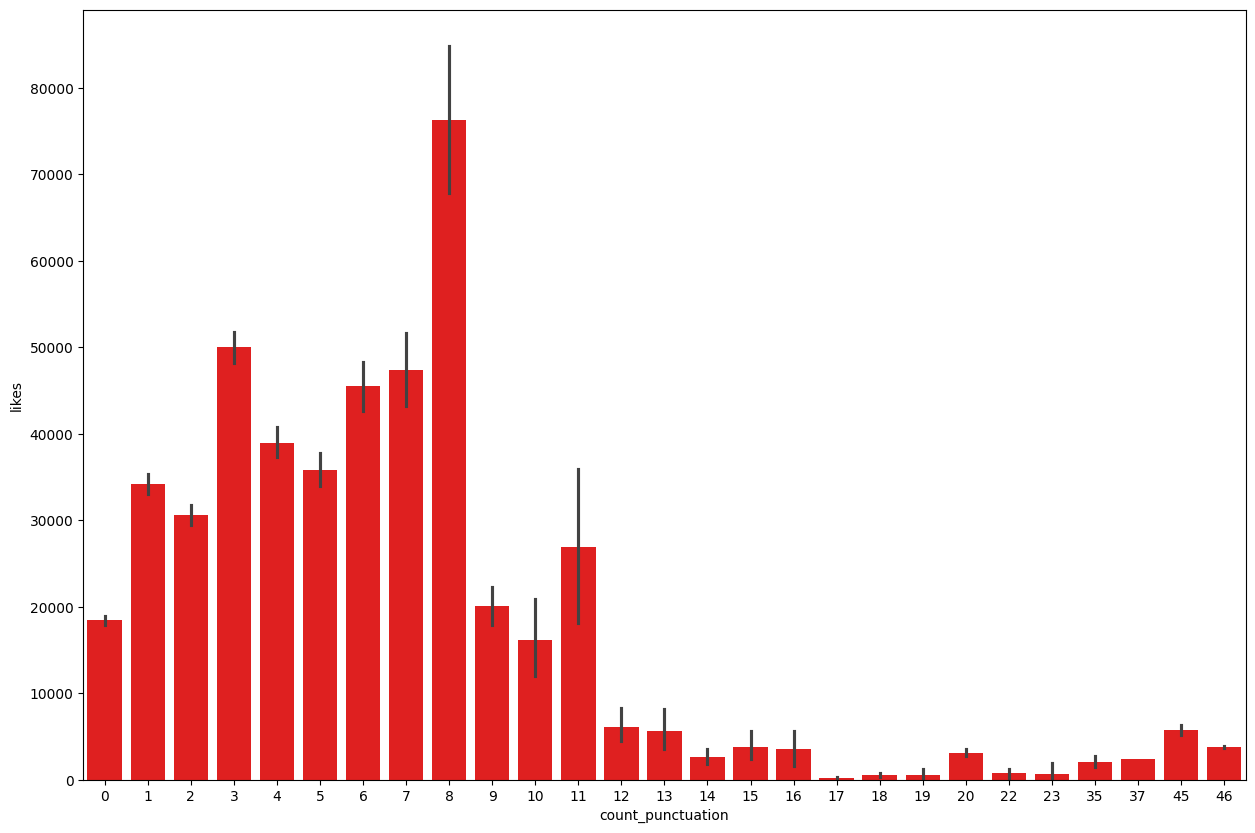

In [94]:
plt.figure(figsize=(15,10))
sns.barplot(x='count_punctuation',y='likes',data=full_df,color='red')
plt.show()

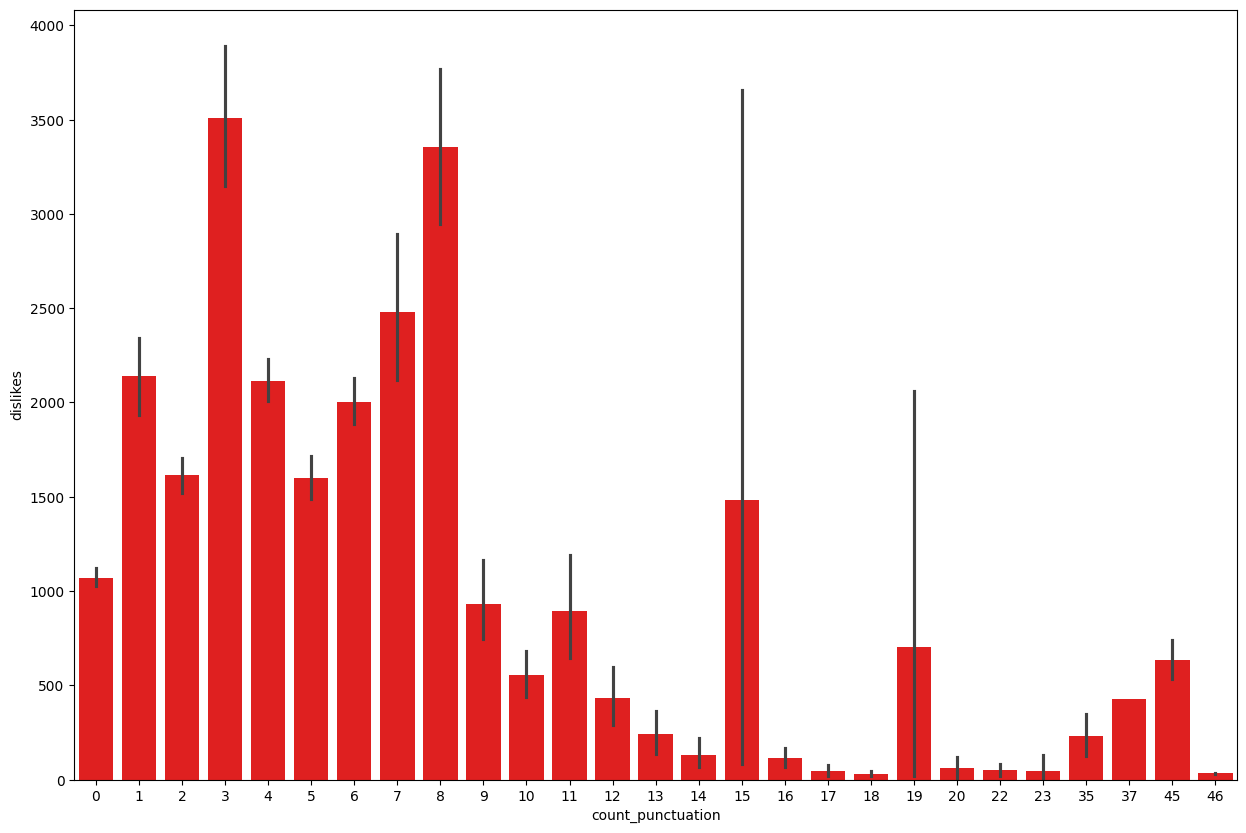

In [95]:
plt.figure(figsize=(15,10))
sns.barplot(x='count_punctuation',y='dislikes',data=full_df,color='red')
plt.show()

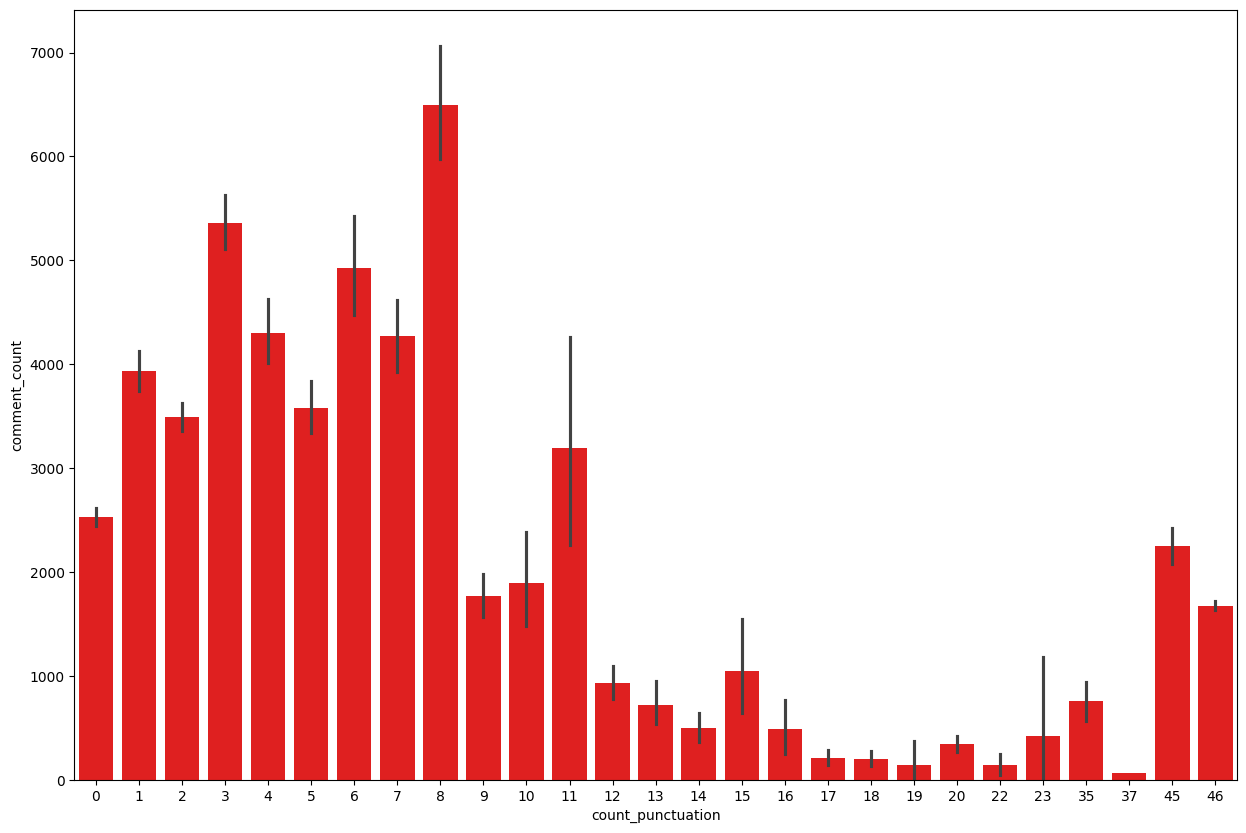

In [96]:
plt.figure(figsize=(15,10))
sns.barplot(x='count_punctuation',y='comment_count',data=full_df,color='red')
plt.show()